<a href="https://colab.research.google.com/github/NickOUTNN/Machine-Learning-NNSU/blob/main/Segmentation_Unet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image

# Начало, загрузка картинок

In [ ]:
! unzip archive.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: cityscapes_data/cityscapes_data/train/2754.jpg  
  inflating: cityscapes_data/cityscapes_data/train/2755.jpg  
  inflating: cityscapes_data/cityscapes_data/train/2756.jpg  
  inflating: cityscapes_data/cityscapes_data/train/2757.jpg  
  inflating: cityscapes_data/cityscapes_data/train/2758.jpg  
  inflating: cityscapes_data/cityscapes_data/train/2759.jpg  
  inflating: cityscapes_data/cityscapes_data/train/276.jpg  
  inflating: cityscapes_data/cityscapes_data/train/2760.jpg  
  inflating: cityscapes_data/cityscapes_data/train/2761.jpg  
  inflating: cityscapes_data/cityscapes_data/train/2762.jpg  
  inflating: cityscapes_data/cityscapes_data/train/2763.jpg  
  inflating: cityscapes_data/cityscapes_data/train/2764.jpg  
  inflating: cityscapes_data/cityscapes_data/train/2765.jpg  
  inflating: cityscapes_data/cityscapes_data/train/2766.jpg  
  inflating: cityscapes_data/cityscapes_data/train/2767.jpg  
  i

In [ ]:
train_path = glob("/content/cityscapes_data/train/*")
valid_path = glob("/content/cityscapes_data/val/*")

In [ ]:
train_path[0]

'/content/cityscapes_data/train/2588.jpg'

In [ ]:
img = plt.imread(train_path[0])

In [ ]:
img.shape

(256, 512, 3)

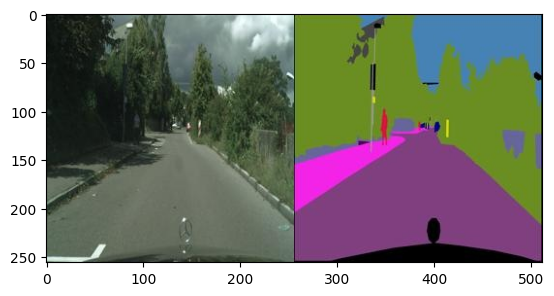

In [ ]:
plt.imshow(img)

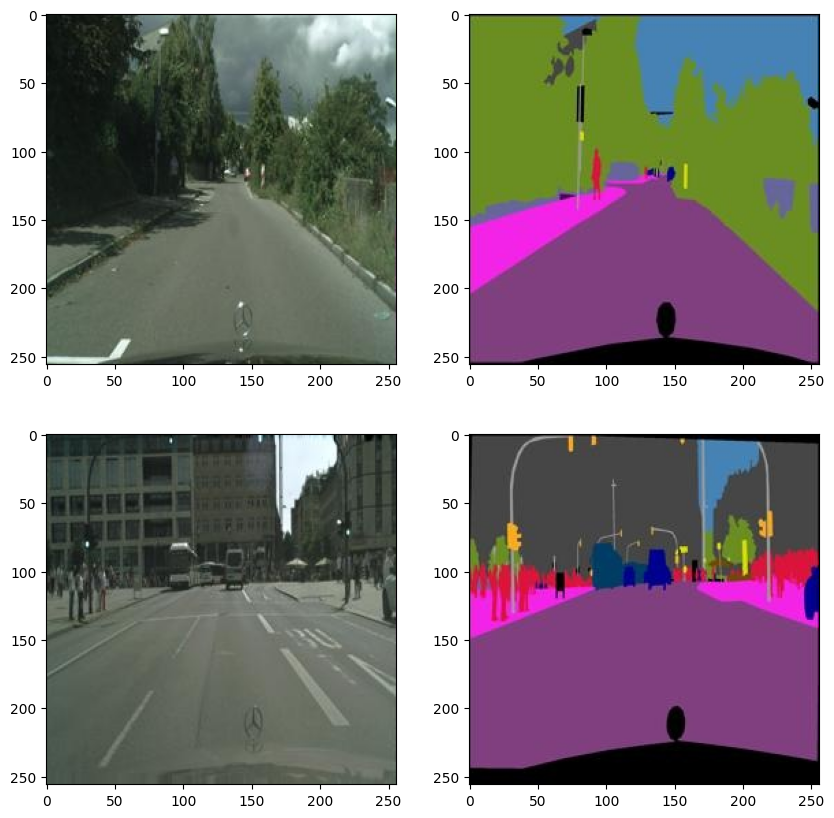

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i in range(2):
    img = plt.imread(train_path[i])
    ax[i][0].imshow(img[:,:256,:])
    ax[i][1].imshow(img[:,256:,:])

In [ ]:
train_images = []
train_masks = []

In [ ]:
for path in  train_path[:500]:
    image_mask = Image.open(path)

    image, mask = image_mask.crop([0, 0, 256, 256]), image_mask.crop([256, 0, 512, 256])
    image = image.resize([128, 128])
    mask = mask.resize([128, 128])

    image = np.array(image) / 255
    mask = np.array(mask)

    train_images.append(image)
    train_masks.append(mask)

In [ ]:
train_images[10].shape

(128, 128, 3)

In [ ]:
train_masks[10].shape

(128, 128, 3)

In [ ]:
len(train_images)

500

In [ ]:
valid_images = []
valid_masks = []

In [ ]:
for path in  valid_path[:100]:
    image_mask = Image.open(path)

    image, mask = image_mask.crop([0, 0, 256, 256]), image_mask.crop([256, 0, 512, 256])
    image = image.resize([128, 128])
    mask = mask.resize([128, 128])

    image = np.array(image) / 255
    mask = np.array(mask)

    valid_images.append(image)
    valid_masks.append(mask)

In [ ]:
len(valid_images)

100

In [ ]:
valid_masks[10].shape

(128, 128, 3)

# Конвертация в one-hot_encoding

In [ ]:
arr_col = [
    [0, 0, 0], # unlabelled
    [111, 74,  0], #static
    [81,  0, 81], #ground
    [128, 64,127], #road
    [244, 35,232], #sidewalk
    [250,170,160], #parking
    [230,150,140], #rail track
    [70, 70, 70], #building
    [102,102,156], #wall
    [190,153,153], #fence
    [180,165,180], #guard rail
    [150,100,100], #bridge
    [150,120, 90], #tunnel
    [153,153,153], #pole
    [153,153,153], #polegroup
    [250,170, 30], #traffic light
    [220,220,  0], #traffic sign
    [107,142, 35], #vegetation
    [152,251,152], #terrain
    [70,130,180], #sky
    [220, 20, 60], #person
    [255,  0,  0], #rider
    [0,  0,142], #car
    [0,  0, 70], #truck
    [0, 60,100], #bus
    [0,  0, 90], #caravan
    [0,  0,110], #trailer
    [0, 80,100], #train
    [0,  0,230], #motorcycle
    [119, 11, 32], #bicycle
    [0,  0,142] #license plate
]

In [ ]:
n_classes = len(arr_col)

def MaskEncoding(mask):

    y_ind = np.zeros((mask.shape[0], mask.shape[1]))
    y_cat = np.zeros((mask.shape[0], mask.shape[1], len(arr_col)))
    dss = np.zeros((mask.shape[0], mask.shape[1], len(arr_col)))

    for i in range(len(arr_col)):
      dss[..., i]  = np.linalg.norm(mask - arr_col[i], axis=-1)

    d = np.argmin(dss, axis = -1)
    y_ind = d + 1

    for i in range(len(arr_col)):
      ind = np.where(d == i)
      y_cat[ind[0],ind[1],i] = 1

    return y_cat, y_ind

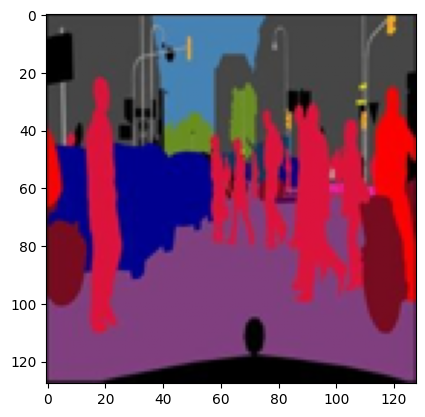

In [ ]:
plt.imshow(train_masks[10] / 255)

(128, 128)


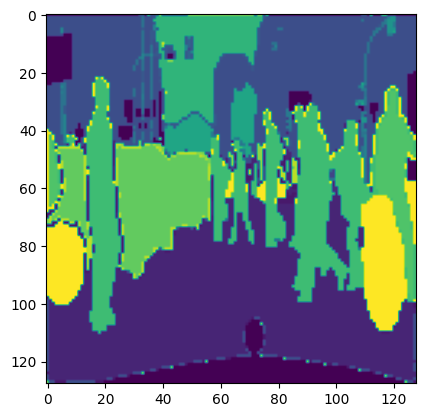

In [ ]:
cat_yi, ind_yi = MaskEncoding(train_masks[10])
print(ind_yi.shape)
plt.imshow(ind_yi)
plt.show()

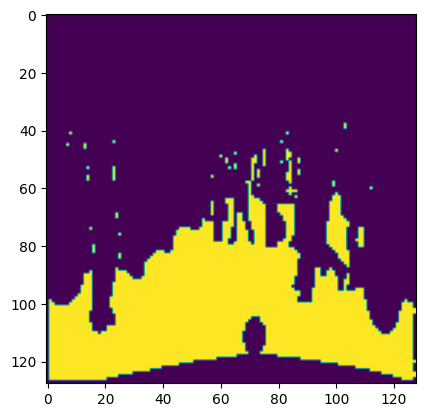

In [ ]:
plt.imshow(cat_yi[..., 3])
plt.show()

In [ ]:
X_train = np.array(train_images)
X_val = np.array(valid_images)

In [ ]:
y_train = []

for mask in train_masks:
  y_cat, _ = MaskEncoding(mask)
  y_train.append(y_cat)

y_train = np.array(y_train)

In [ ]:
y_train.shape

(500, 128, 128, 31)

In [ ]:
y_val = []

for mask in valid_masks:
  y_cat, _ = MaskEncoding(mask)
  y_val.append(y_cat)

y_val = np.array(y_val)

In [ ]:
y_val.shape

(100, 128, 128, 31)

In [ ]:
del train_masks, valid_masks

In [ ]:
del train_images,valid_images

# Создание модели

In [ ]:
import keras.backend as K


def dice_coef(y_true, y_pred):
    return (2. * K.sum(y_true * y_pred) + 1) / (K.sum(y_true) + K.sum(y_pred) + 1)

In [ ]:
from keras.layers import (Activation, Input, MaxPooling2D, BatchNormalization,
                          Conv2D, Conv2DTranspose, concatenate)
from keras.models import Model, Sequential
from tensorflow.keras.utils import plot_model


def Unet(num_classes=31, input_shape=(256, 256, 3)):
    img_input = Input(input_shape)

    # Block 1
    x = Conv2D(64, (3, 3), padding='same', name='block1_conv1')(img_input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(64, (3, 3), padding='same', name='block1_conv2')(x)
    x = BatchNormalization()(x)

    # запомним тензор для переноса
    block_1_out = Activation('relu')(x)

    x = MaxPooling2D()(block_1_out)


    # Block 2
    x = Conv2D(128, (3, 3), padding='same', name='block2_conv1')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(128, (3, 3), padding='same', name='block2_conv2')(x)
    x = BatchNormalization()(x)

    # запомним тензор для переноса
    block_2_out = Activation('relu')(x)

    x = MaxPooling2D()(block_2_out)


    # Block 3
    x = Conv2D(256, (3, 3), padding='same', name='block3_conv1')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(256, (3, 3), padding='same', name='block3_conv2')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(256, (3, 3), padding='same', name='block3_conv3')(x)
    x = BatchNormalization()(x)

    # запомним тензор для переноса
    block_3_out = Activation('relu')(x)

    x = MaxPooling2D()(block_3_out)


    # Block 4
    x = Conv2D(512, (3, 3), padding='same', name='block4_conv1')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(512, (3, 3), padding='same', name='block4_conv2')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(512, (3, 3), padding='same', name='block4_conv3')(x)
    x = BatchNormalization()(x)

    # запомним тензор для переноса
    block_4_out = Activation('relu')(x)


    # UP 1
    x = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = concatenate([x, block_3_out])
    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(256, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # UP 2
    x = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = concatenate([x, block_2_out])
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # UP 3
    x = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = concatenate([x, block_1_out])
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)


    # слой классификатор
    x = Conv2D(num_classes, (3, 3), activation='softmax', padding='same')(x)

    model = Model(img_input, x)
    return model

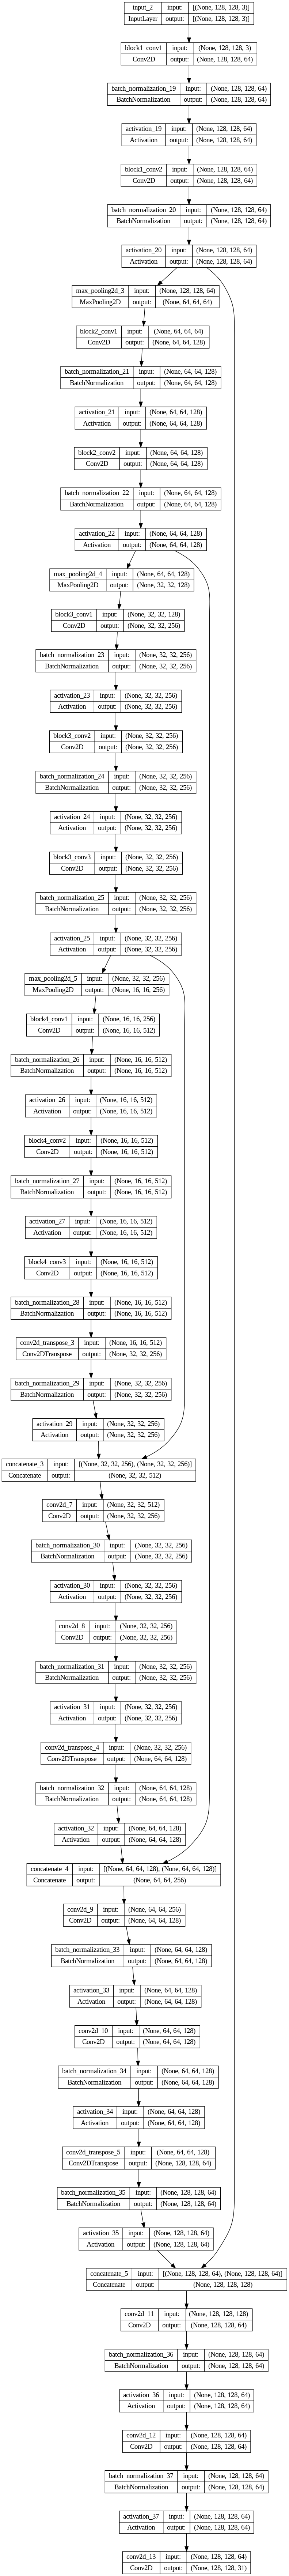

In [ ]:
model_1 = Unet(n_classes, (128, 128, 3))

plot_model(model_1, to_file='model_1.png', show_shapes=True)

In [ ]:
from tensorflow.keras.optimizers import Adam

model_1.compile(optimizer=Adam(),
                loss='categorical_crossentropy',
                metrics=[dice_coef])
model_1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 128, 128, 64)         1792      ['input_2[0][0]']             
                                                                                                  
 batch_normalization_19 (Ba  (None, 128, 128, 64)         256       ['block1_conv1[0][0]']        
 tchNormalization)                                                                                
                                                                                                  
 activation_19 (Activation)  (None, 128, 128, 64)         0         ['batch_normalization_19

# Обучение

In [ ]:
sample_image = X_val[0]
sample_mask = y_val[0]

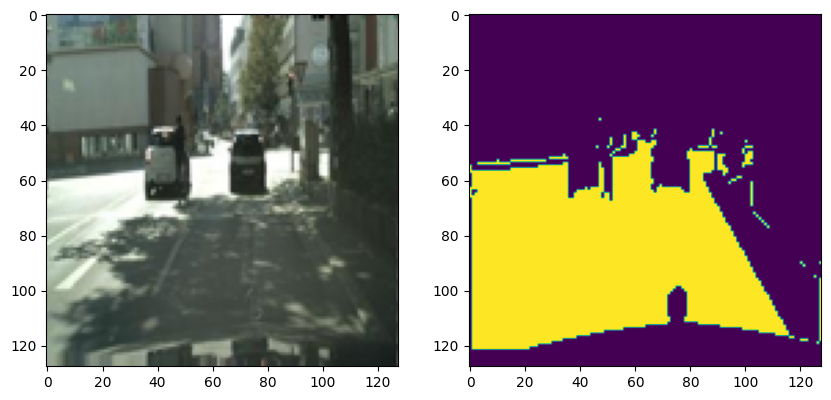

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 8))

ax[0].imshow(sample_image)
ax[1].imshow(sample_mask[..., 3])

In [ ]:
import keras

def show_predictions(model):
    pred_mask = model.predict(sample_image[None])[..., 3]

    fig, ax = plt.subplots(1, 3, figsize=(10, 8))

    ax[0].imshow(sample_image)
    ax[1].imshow(sample_mask[..., 3])
    ax[2].imshow(np.squeeze(pred_mask, axis=0))
    plt.show()


class DisplayCallback(keras.callbacks.Callback):
    def __init__(self, patience=1):
        super().__init__()
        self.patience = patience

    def on_train_begin(self, logs=None):
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        self.wait += 1
        if self.wait >= self.patience:
            show_predictions(self.model)
            print(f'\nSample Prediction after epoch {epoch+1}')
            self.wait = 0

Epoch 1/50
 6/32 [====>.........................] - ETA: 5s - loss: 2.5075 - dice_coef: 0.1759

32/32 [==============================] - 19s 266ms/step - loss: 1.5173 - dice_coef: 0.4589 - val_loss: 3.8495 - val_dice_coef: 0.0978
Epoch 2/50
32/32 [==============================] - 7s 231ms/step - loss: 1.0508 - dice_coef: 0.5939 - val_loss: 3.5450 - val_dice_coef: 0.1252
Epoch 3/50
32/32 [==============================] - 8s 240ms/step - loss: 0.9865 - dice_coef: 0.6127 - val_loss: 5.4051 - val_dice_coef: 0.1211
Epoch 4/50
32/32 [==============================] - 8s 239ms/step - loss: 0.9348 - dice_coef: 0.6333 - val_loss: 6.4301 - val_dice_coef: 0.1044
Epoch 5/50
1/1 [==============================] - 0s 350ms/step


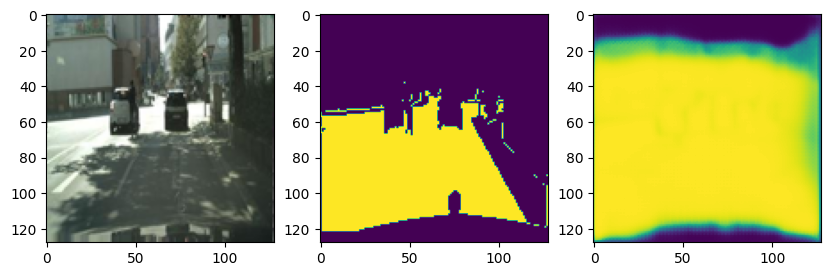


Sample Prediction after epoch 5
32/32 [==============================] - 9s 268ms/step - loss: 0.8902 - dice_coef: 0.6469 - val_loss: 3.7414 - val_dice_coef: 0.3988
Epoch 6/50
32/32 [==============================] - 8s 239ms/step - loss: 0.8618 - dice_coef: 0.6566 - val_loss: 3.7207 - val_dice_coef: 0.4246
Epoch 7/50
32/32 [==============================] - 8s 244ms/step - loss: 0.8278 - dice_coef: 0.6735 - val_loss: 2.6267 - val_dice_coef: 0.4825
Epoch 8/50
32/32 [==============================] - 8s 245ms/step - loss: 0.7950 - dice_coef: 0.6870 - val_loss: 1.9837 - val_dice_coef: 0.4905
Epoch 9/50
32/32 [==============================] - 8s 243ms/step - loss: 0.7822 - dice_coef: 0.6884 - val_loss: 1.8966 - val_dice_coef: 0.5110
Epoch 10/50
1/1 [==============================] - 0s 31ms/step


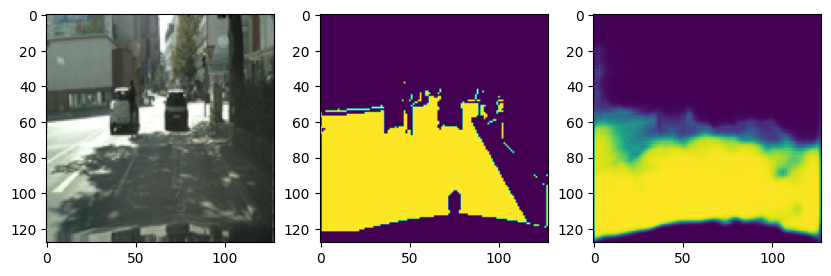


Sample Prediction after epoch 10
32/32 [==============================] - 9s 278ms/step - loss: 0.7645 - dice_coef: 0.6965 - val_loss: 1.9523 - val_dice_coef: 0.5495
Epoch 11/50
32/32 [==============================] - 8s 241ms/step - loss: 0.7635 - dice_coef: 0.7009 - val_loss: 2.5897 - val_dice_coef: 0.4944
Epoch 12/50
32/32 [==============================] - 8s 243ms/step - loss: 0.7492 - dice_coef: 0.7026 - val_loss: 1.4313 - val_dice_coef: 0.5718
Epoch 13/50
32/32 [==============================] - 8s 239ms/step - loss: 0.7578 - dice_coef: 0.6976 - val_loss: 1.5603 - val_dice_coef: 0.5744
Epoch 14/50
32/32 [==============================] - 8s 236ms/step - loss: 0.7214 - dice_coef: 0.7139 - val_loss: 1.2367 - val_dice_coef: 0.6170
Epoch 15/50
1/1 [==============================] - 0s 21ms/step


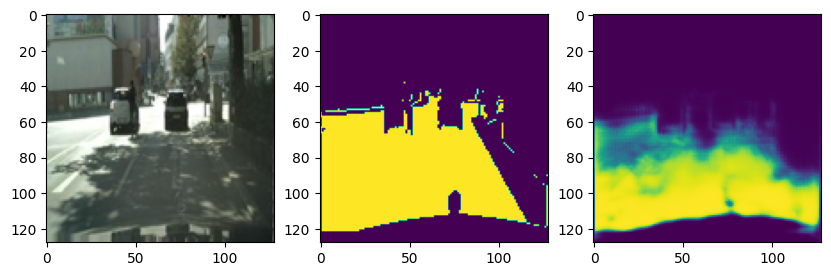


Sample Prediction after epoch 15
32/32 [==============================] - 8s 259ms/step - loss: 0.7059 - dice_coef: 0.7188 - val_loss: 1.0964 - val_dice_coef: 0.6361
Epoch 16/50
32/32 [==============================] - 8s 236ms/step - loss: 0.6902 - dice_coef: 0.7235 - val_loss: 1.1819 - val_dice_coef: 0.6225
Epoch 17/50
32/32 [==============================] - 8s 244ms/step - loss: 0.6902 - dice_coef: 0.7236 - val_loss: 1.1200 - val_dice_coef: 0.6783
Epoch 18/50
32/32 [==============================] - 8s 239ms/step - loss: 0.6559 - dice_coef: 0.7358 - val_loss: 0.8704 - val_dice_coef: 0.7014
Epoch 19/50
32/32 [==============================] - 8s 240ms/step - loss: 0.6557 - dice_coef: 0.7377 - val_loss: 0.9018 - val_dice_coef: 0.7066
Epoch 20/50
1/1 [==============================] - 0s 20ms/step


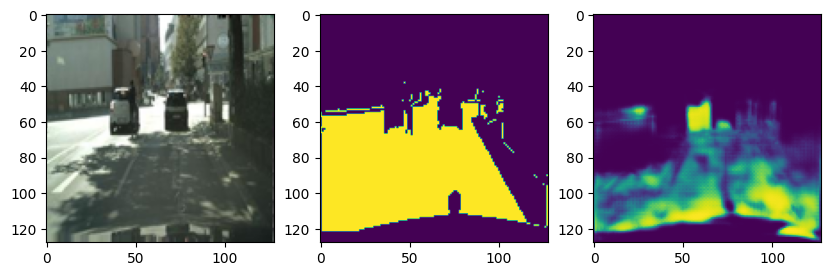


Sample Prediction after epoch 20
32/32 [==============================] - 8s 261ms/step - loss: 0.6612 - dice_coef: 0.7362 - val_loss: 1.0349 - val_dice_coef: 0.6828
Epoch 21/50
32/32 [==============================] - 8s 244ms/step - loss: 0.6455 - dice_coef: 0.7399 - val_loss: 0.8724 - val_dice_coef: 0.7043
Epoch 22/50
32/32 [==============================] - 8s 237ms/step - loss: 0.6175 - dice_coef: 0.7500 - val_loss: 0.8130 - val_dice_coef: 0.6973
Epoch 23/50
32/32 [==============================] - 8s 244ms/step - loss: 0.5939 - dice_coef: 0.7567 - val_loss: 0.8615 - val_dice_coef: 0.7084
Epoch 24/50
32/32 [==============================] - 8s 241ms/step - loss: 0.6194 - dice_coef: 0.7516 - val_loss: 0.9737 - val_dice_coef: 0.6996
Epoch 25/50
1/1 [==============================] - 0s 30ms/step


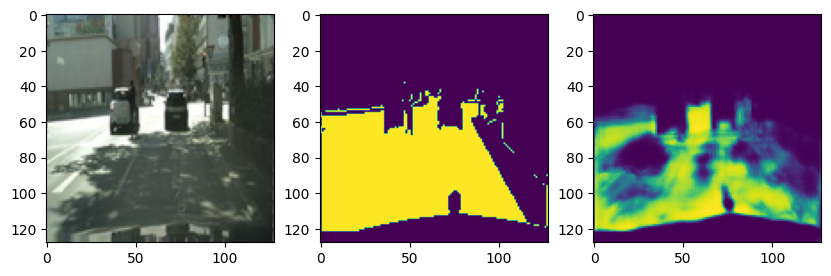


Sample Prediction after epoch 25
32/32 [==============================] - 8s 255ms/step - loss: 0.5949 - dice_coef: 0.7563 - val_loss: 0.7884 - val_dice_coef: 0.7161
Epoch 26/50
32/32 [==============================] - 8s 243ms/step - loss: 0.5942 - dice_coef: 0.7592 - val_loss: 0.9627 - val_dice_coef: 0.6841
Epoch 27/50
32/32 [==============================] - 8s 238ms/step - loss: 0.5711 - dice_coef: 0.7653 - val_loss: 1.0461 - val_dice_coef: 0.6695
Epoch 28/50
32/32 [==============================] - 8s 240ms/step - loss: 0.5617 - dice_coef: 0.7674 - val_loss: 0.8296 - val_dice_coef: 0.7374
Epoch 29/50
32/32 [==============================] - 8s 245ms/step - loss: 0.5580 - dice_coef: 0.7717 - val_loss: 0.8227 - val_dice_coef: 0.7149
Epoch 30/50
1/1 [==============================] - 0s 19ms/step


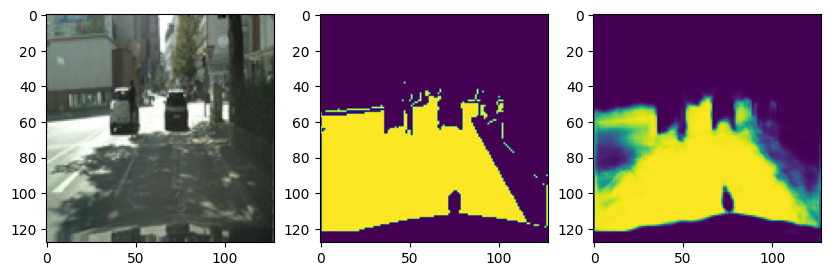


Sample Prediction after epoch 30
32/32 [==============================] - 8s 254ms/step - loss: 0.5561 - dice_coef: 0.7709 - val_loss: 0.8090 - val_dice_coef: 0.7419
Epoch 31/50
32/32 [==============================] - 8s 243ms/step - loss: 0.5531 - dice_coef: 0.7699 - val_loss: 0.7747 - val_dice_coef: 0.7249
Epoch 32/50
32/32 [==============================] - 8s 243ms/step - loss: 0.5375 - dice_coef: 0.7771 - val_loss: 0.8217 - val_dice_coef: 0.7235
Epoch 33/50
32/32 [==============================] - 8s 242ms/step - loss: 0.5424 - dice_coef: 0.7741 - val_loss: 0.7767 - val_dice_coef: 0.7244
Epoch 34/50
32/32 [==============================] - 8s 246ms/step - loss: 0.5228 - dice_coef: 0.7847 - val_loss: 0.7751 - val_dice_coef: 0.7216
Epoch 35/50
1/1 [==============================] - 0s 30ms/step


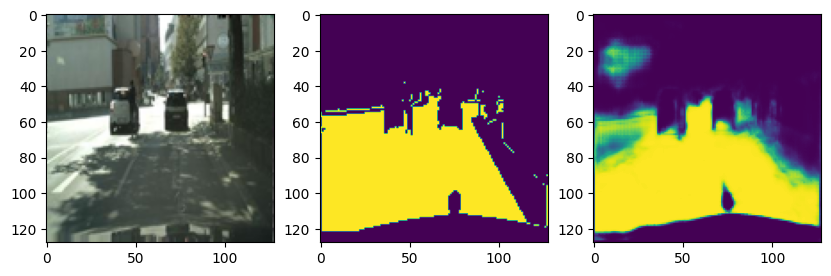


Sample Prediction after epoch 35
32/32 [==============================] - 8s 267ms/step - loss: 0.5051 - dice_coef: 0.7879 - val_loss: 0.7673 - val_dice_coef: 0.7423
Epoch 36/50
32/32 [==============================] - 8s 241ms/step - loss: 0.5029 - dice_coef: 0.7897 - val_loss: 0.7976 - val_dice_coef: 0.7511
Epoch 37/50
32/32 [==============================] - 8s 241ms/step - loss: 0.4906 - dice_coef: 0.7953 - val_loss: 0.7939 - val_dice_coef: 0.7387
Epoch 38/50
32/32 [==============================] - 8s 241ms/step - loss: 0.4906 - dice_coef: 0.7951 - val_loss: 0.8192 - val_dice_coef: 0.7358
Epoch 39/50
32/32 [==============================] - 8s 240ms/step - loss: 0.4826 - dice_coef: 0.7990 - val_loss: 0.7892 - val_dice_coef: 0.7576
Epoch 40/50
1/1 [==============================] - 0s 20ms/step


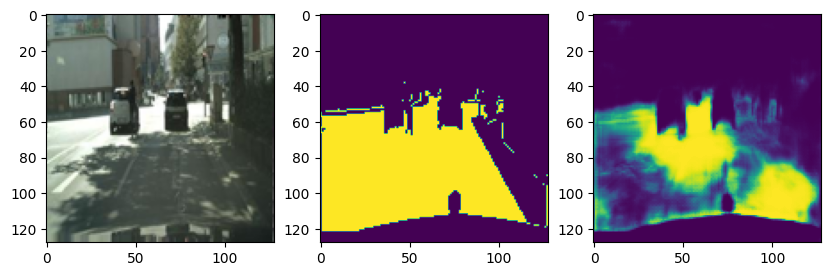


Sample Prediction after epoch 40
32/32 [==============================] - 8s 258ms/step - loss: 0.5089 - dice_coef: 0.7901 - val_loss: 0.8682 - val_dice_coef: 0.7173
Epoch 41/50
32/32 [==============================] - 8s 235ms/step - loss: 0.4795 - dice_coef: 0.7995 - val_loss: 0.8377 - val_dice_coef: 0.7495
Epoch 42/50
32/32 [==============================] - 8s 241ms/step - loss: 0.4469 - dice_coef: 0.8110 - val_loss: 0.7273 - val_dice_coef: 0.7543
Epoch 43/50
32/32 [==============================] - 8s 237ms/step - loss: 0.4405 - dice_coef: 0.8145 - val_loss: 0.7608 - val_dice_coef: 0.7467
Epoch 44/50
32/32 [==============================] - 8s 242ms/step - loss: 0.4349 - dice_coef: 0.8174 - val_loss: 0.8376 - val_dice_coef: 0.7254
Epoch 45/50
1/1 [==============================] - 0s 30ms/step


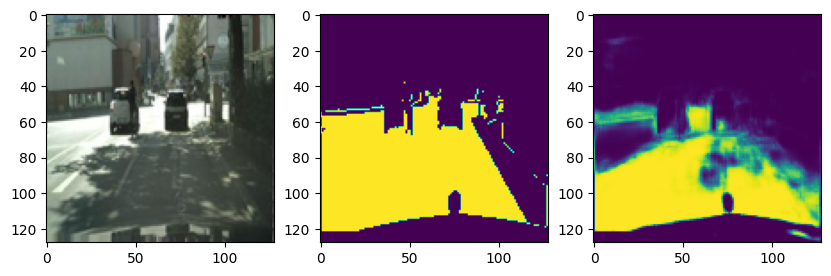


Sample Prediction after epoch 45
32/32 [==============================] - 8s 261ms/step - loss: 0.4227 - dice_coef: 0.8216 - val_loss: 0.7505 - val_dice_coef: 0.7375
Epoch 46/50
32/32 [==============================] - 8s 240ms/step - loss: 0.4130 - dice_coef: 0.8252 - val_loss: 0.7693 - val_dice_coef: 0.7526
Epoch 47/50
32/32 [==============================] - 8s 242ms/step - loss: 0.4095 - dice_coef: 0.8263 - val_loss: 0.8940 - val_dice_coef: 0.7291
Epoch 48/50
32/32 [==============================] - 8s 240ms/step - loss: 0.4115 - dice_coef: 0.8263 - val_loss: 0.8728 - val_dice_coef: 0.7099
Epoch 49/50
32/32 [==============================] - 8s 242ms/step - loss: 0.4336 - dice_coef: 0.8198 - val_loss: 0.8440 - val_dice_coef: 0.7139
Epoch 50/50
1/1 [==============================] - 0s 20ms/step


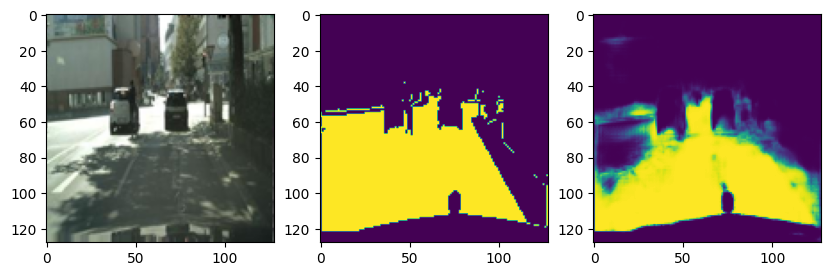


Sample Prediction after epoch 50
32/32 [==============================] - 8s 255ms/step - loss: 0.4262 - dice_coef: 0.8221 - val_loss: 0.7984 - val_dice_coef: 0.7562


In [ ]:
history = model_1.fit(X_train, y_train,
                      epochs=50,
                      batch_size=16,
                      validation_data=(X_val, y_val),
                      callbacks=[DisplayCallback(patience=5)])

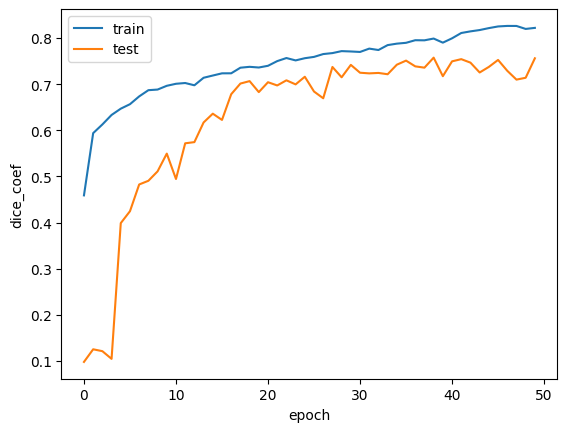

In [ ]:
plt.plot(history.history['dice_coef'], label='train')
plt.plot(history.history['val_dice_coef'], label='test')

plt.legend()
plt.xlabel('epoch')
plt.ylabel('dice_coef')
plt.show()